In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from env import get_db_url

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format


In [2]:
df = pd.read_csv('zillow.csv')

In [3]:
df.head()

,Unnamed: 0,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,0,1727539,14297519,3.50,4.00,3.50,"3,100.00","3,100.00","6,059.00",3.00,...,"1,998.00","485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0.03,2017-01-01,Single Family Residential
1,1,1387261,17052889,1.00,2.00,1.00,"1,465.00","1,465.00","6,111.00",1.00,...,"1,967.00","88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",0.06,2017-01-01,Single Family Residential
2,2,11677,14186244,2.00,3.00,2.00,"1,243.00","1,243.00","6,059.00",2.00,...,"1,962.00","85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",0.01,2017-01-01,Single Family Residential
3,3,2288172,12177905,3.00,4.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,...,"1,970.00","108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01,Single Family Residential
4,4,781532,12095076,3.00,4.00,3.00,"2,962.00","2,962.00","6,037.00",3.00,...,"1,950.00","276,684.00","773,303.00","2,016.00","496,619.00","9,516.26","60,374,608,001,014.00",-0.00,2017-01-01,Single Family Residential


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52317 entries, 0 to 52316
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52317 non-null  int64  
 1   id                            52317 non-null  int64  
 2   parcelid                      52317 non-null  int64  
 3   bathroomcnt                   52317 non-null  float64
 4   bedroomcnt                    52317 non-null  float64
 5   calculatedbathnbr             52184 non-null  float64
 6   calculatedfinishedsquarefeet  52238 non-null  float64
 7   finishedsquarefeet12          52073 non-null  float64
 8   fips                          52317 non-null  float64
 9   fullbathcnt                   52184 non-null  float64
 10  latitude                      52317 non-null  float64
 11  longitude                     52317 non-null  float64
 12  lotsizesquarefeet             51953 non-null  float64
 13  p

## Is logerror significantly different in LA County vs Orange County vs Ventura County?

In [5]:
train, test_validate = train_test_split(df, train_size=.7, random_state=123)

In [6]:
test, validate = train_test_split(test_validate, train_size=.5, random_state=123)

In [7]:
#train.info()

In [8]:
#validate.info()

In [9]:
#test.info()

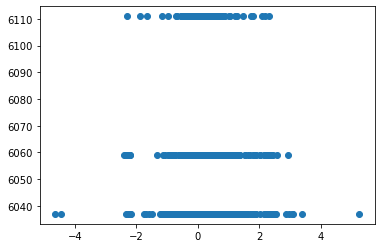

In [11]:
plt.scatter(train.fips, train.fips)